In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import six
from six.moves import range
from scipy.stats import multivariate_normal
import sys

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
X = np.loadtxt('iris.data', dtype='object', delimiter=',')
Y = X[:,-1]
X = X[:, :-1].astype('f')
X.shape, Y.shape, Y.dtype

((150, 4), (150,), dtype('O'))

`X` is a `NxK` float matrix where each row (`X[i]`) corresponds to a data point.

In [11]:
def gmm(X, n_classes, n_iter):
    # TODO fill in your code here

    k = n_classes
    
    # n = number of data-points, d = dimension of data points        
    n, d = X.shape
    
    ##### INITIALIZATION
    weights = np.array([1./ k] *  k)
    means = np.array(X[np.random.choice(n,  k, False), :])
    
    # Initialize covariance matrix
    cov = np.array([np.eye(d)] * k)

    r_ic = np.zeros((n, k))
    
    log_likelihoods = []
    
    P = lambda mu, s: np.linalg.det(s) ** -.5 * (2 * np.pi) ** (-X.shape[1]/2.) \
                * np.exp(-.5 * np.einsum('ij, ij -> i',\
                        X - mu, np.dot(np.linalg.inv(s) , (X - mu).T).T ) ) 
                    
    for itr in range(n_iter):
        # E - Step
        for c in range(k):
            r_ic[:, c] = weights[c] * P(means[c], cov[c])
            
        log_likelihood = np.sum(np.log(np.sum(r_ic, axis=1)))
            
        log_likelihoods.append(log_likelihood)
        print("Log Likelihood:", log_likelihood)
        
        # Normalize
        r_ic = (r_ic.T / np.sum(r_ic, axis = 1)).T            

        ##### MAXIMIZATION
        m_c = np.sum(r_ic, axis=0)
        # Update weights
        weights = m_c / np.sum(r_ic)

        for c in range(k):
            
            # Update Mean
            means[c] = 1. / m_c[c] * np.sum( r_ic[:,c].reshape(X.shape[0],1) * X , axis=0)

            # Update Covariance
            x_mu = X - means[c]
            cov[c] = (1. / m_c[c]) * np.dot( (r_ic[:,c].reshape(X.shape[0],1) * x_mu ).T, x_mu)
    
    # Pick prediction with largest probability
    class_assignments = np.argmax(r_ic, axis=1)
    
    return class_assignments, means, cov

In [12]:
class_assignments, mean, cov = gmm(X, 3, 300)  # You may want to tune the number of iterations

Log Likelihood: -906.2735296330494
Log Likelihood: -324.99761515198236
Log Likelihood: -306.17489292051573
Log Likelihood: -290.54571339838776
Log Likelihood: -278.7731547575823
Log Likelihood: -267.57837409255103
Log Likelihood: -249.6130539055601
Log Likelihood: -223.7194520064614
Log Likelihood: -187.24894496067213
Log Likelihood: -183.37472869781112
Log Likelihood: -182.799238684464
Log Likelihood: -182.31177446773748
Log Likelihood: -181.70865678096354
Log Likelihood: -181.2406671201591
Log Likelihood: -181.07034304156227
Log Likelihood: -181.01959687709228
Log Likelihood: -181.0040337871561
Log Likelihood: -180.99918789524835
Log Likelihood: -180.99766395250322
Log Likelihood: -180.99718146396128
Log Likelihood: -180.99702799795622
Log Likelihood: -180.99697905464575
Log Likelihood: -180.99696342812044
Log Likelihood: -180.9969584437429
Log Likelihood: -180.99695684642234
Log Likelihood: -180.9969563353324
Log Likelihood: -180.99695617275165
Log Likelihood: -180.99695611994167
Lo

## Visualization: a Cross Section

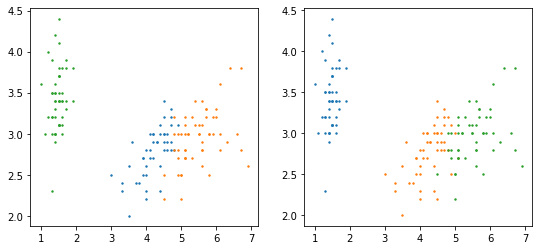

In [17]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(X[class_assignments==k, 2], X[class_assignments==k, 1], s=2)
plt.subplot(122)
for k, class_name in enumerate(np.unique(Y)):
    plt.scatter(X[Y==class_name, 2], X[Y==class_name, 1], s=2)
plt.savefig("PLAIN.png", bbox="tight")

## Visualization: PCA Projection

In [14]:
evals, evecs = np.linalg.eigh(np.cov(X.T))
to_crd = lambda x: ((x-x.mean(axis=0))@evecs)[:,-2:]
crds = to_crd(X)

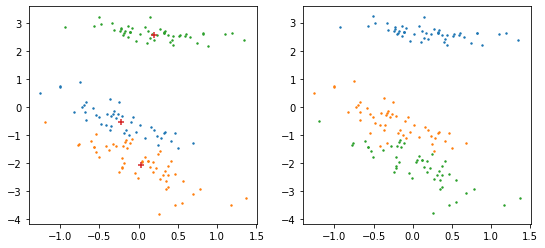

In [18]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(3):
    plt.scatter(crds[class_assignments==k, 0], crds[class_assignments==k, 1], s=2)
plt.scatter(to_crd(mean)[:,0], to_crd(mean)[:,1], s=30, marker='+')
plt.subplot(122)
for k in np.unique(Y):
    plt.scatter(crds[Y==k, 0], crds[Y==k, 1], s=2)
    plt.savefig("PCA_GT.png", bbox="tight")